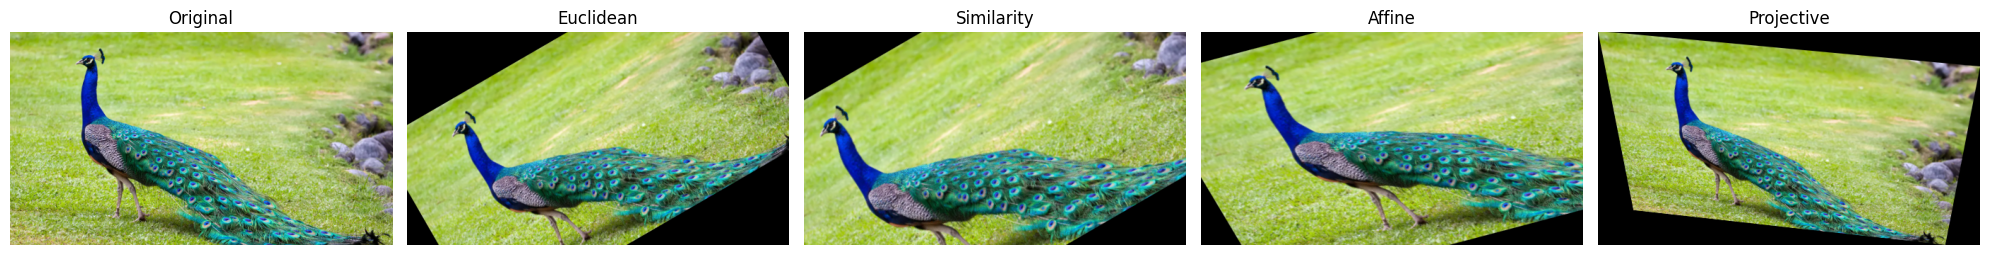

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(cv2.samples.findFile("/content/Screenshot 2025-09-01 145000.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]

M_euclidean = cv2.getRotationMatrix2D((w//2, h//2), 30, 1)
euc_img = cv2.warpAffine(img, M_euclidean, (w, h))

scale = 1.2
M_similarity = cv2.getRotationMatrix2D((w//2, h//2), 30, scale)
sim_img = cv2.warpAffine(img, M_similarity, (w, h))

pts1 = np.float32([[50,50], [200,50], [50,200]])
pts2 = np.float32([[10,100], [200,50], [100,250]])
M_affine = cv2.getAffineTransform(pts1, pts2)
aff_img = cv2.warpAffine(img, M_affine, (w, h))

pts1_proj = np.float32([[0,0],[w-1,0],[0,h-1],[w-1,h-1]])
pts2_proj = np.float32([[0,0],[w-1,50],[50,h-50],[w-50,h-1]])
M_projective = cv2.getPerspectiveTransform(pts1_proj, pts2_proj)
proj_img = cv2.warpPerspective(img, M_projective, (w, h))

fig, axs = plt.subplots(1,5, figsize=(20,6))

axs[0].imshow(img); axs[0].set_title("Original")
axs[1].imshow(euc_img); axs[1].set_title("Euclidean")
axs[2].imshow(sim_img); axs[2].set_title("Similarity")
axs[3].imshow(aff_img); axs[3].set_title("Affine")
axs[4].imshow(proj_img); axs[4].set_title("Projective")

for ax in axs:
    ax.axis("off")

plt.tight_layout()
plt.show()
